In [15]:
import pandas as pd

with open('/home/bio_kang/virus_host_virion/Virion.csv','rb') as f:
    lines = f.readlines()

data_procession = []
for line in lines:
    if len(line) < 34:
        continue
    else:
        data = line.decode('ISO-8859-1').strip('\n').split('\t')

        if data[0] == '' or data[1]=='' or data[2]=='' or data[3] == '' :
            continue
        else:
            data_procession.append(data)



data = pd.DataFrame(data_procession[1:-1],columns=data_procession[0])

In [5]:
data

,Host,Virus,HostTaxID,VirusTaxID,HostNCBIResolved,VirusNCBIResolved,ICTVRatified,HostGenus,HostFamily,HostOrder,...,PMID,ReleaseYear,ReleaseMonth,ReleaseDay,CollectionYear,CollectionMonth,CollectionDay,AssocID,DatabaseDOI,NCBIAccession
0,abramis brama,bream circovirus,38527,1494919,TRUE,TRUE,FALSE,abramis,leuciscidae,cypriniformes,...,,2014,5,5,,,,,,KF358279.1
1,abramis brama,carp sprivivirus,38527,696863,TRUE,TRUE,TRUE,abramis,leuciscidae,cypriniformes,...,,,,,,,,149183,https://doi.org/10.1111/mec.15463,
2,abramis brama,carp sprivivirus,38527,696863,TRUE,TRUE,TRUE,abramis,leuciscidae,cypriniformes,...,19593931,,,,,,,149182,https://doi.org/10.1111/mec.15463,
3,abramis brama,carp sprivivirus,38527,696863,TRUE,TRUE,TRUE,abramis,leuciscidae,cypriniformes,...,,2009,,,,,,149181,https://doi.org/10.1038/sdata.2015.49,281552803
4,abramis brama,carp sprivivirus,38527,696863,TRUE,TRUE,TRUE,abramis,leuciscidae,cypriniformes,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469941,zygodontomys cherriei,necocli orthohantavirus,218840,1980482,TRUE,TRUE,TRUE,zygodontomys,cricetidae,rodentia,...,,2012,2,15,2008,,,,,"JN717148.1, JN717149.1"
469942,zygodontomys cherriei,necocli orthohantavirus,218840,1980482,TRUE,TRUE,TRUE,zygodontomys,cricetidae,rodentia,...,,2015,8,29,2008,3,16,,,KM196124.1
469943,zygodontomys cherriei,necocli orthohantavirus,218840,1980482,TRUE,TRUE,TRUE,zygodontomys,cricetidae,rodentia,...,,2015,8,29,2010,7,31,,,KM196123.1
469944,zygodontomys cherriei,necocli orthohantavirus,218840,1980482,TRUE,TRUE,TRUE,zygodontomys,cricetidae,rodentia,...,,,,,,,,,,


In [6]:
data.shape

(469946, 34)

# reserve process data

In [12]:
# data.to_csv('process_Virion.csv', index=None, header=True)

In [8]:
data_from = data['Database'].value_counts()

In [9]:
data_from

GenBank    381619
EID2        57156
GLOBI       16698
Shaw         8607
HP3          2766
GMPD2        1642
PREDICT      1458
Name: Database, dtype: int64

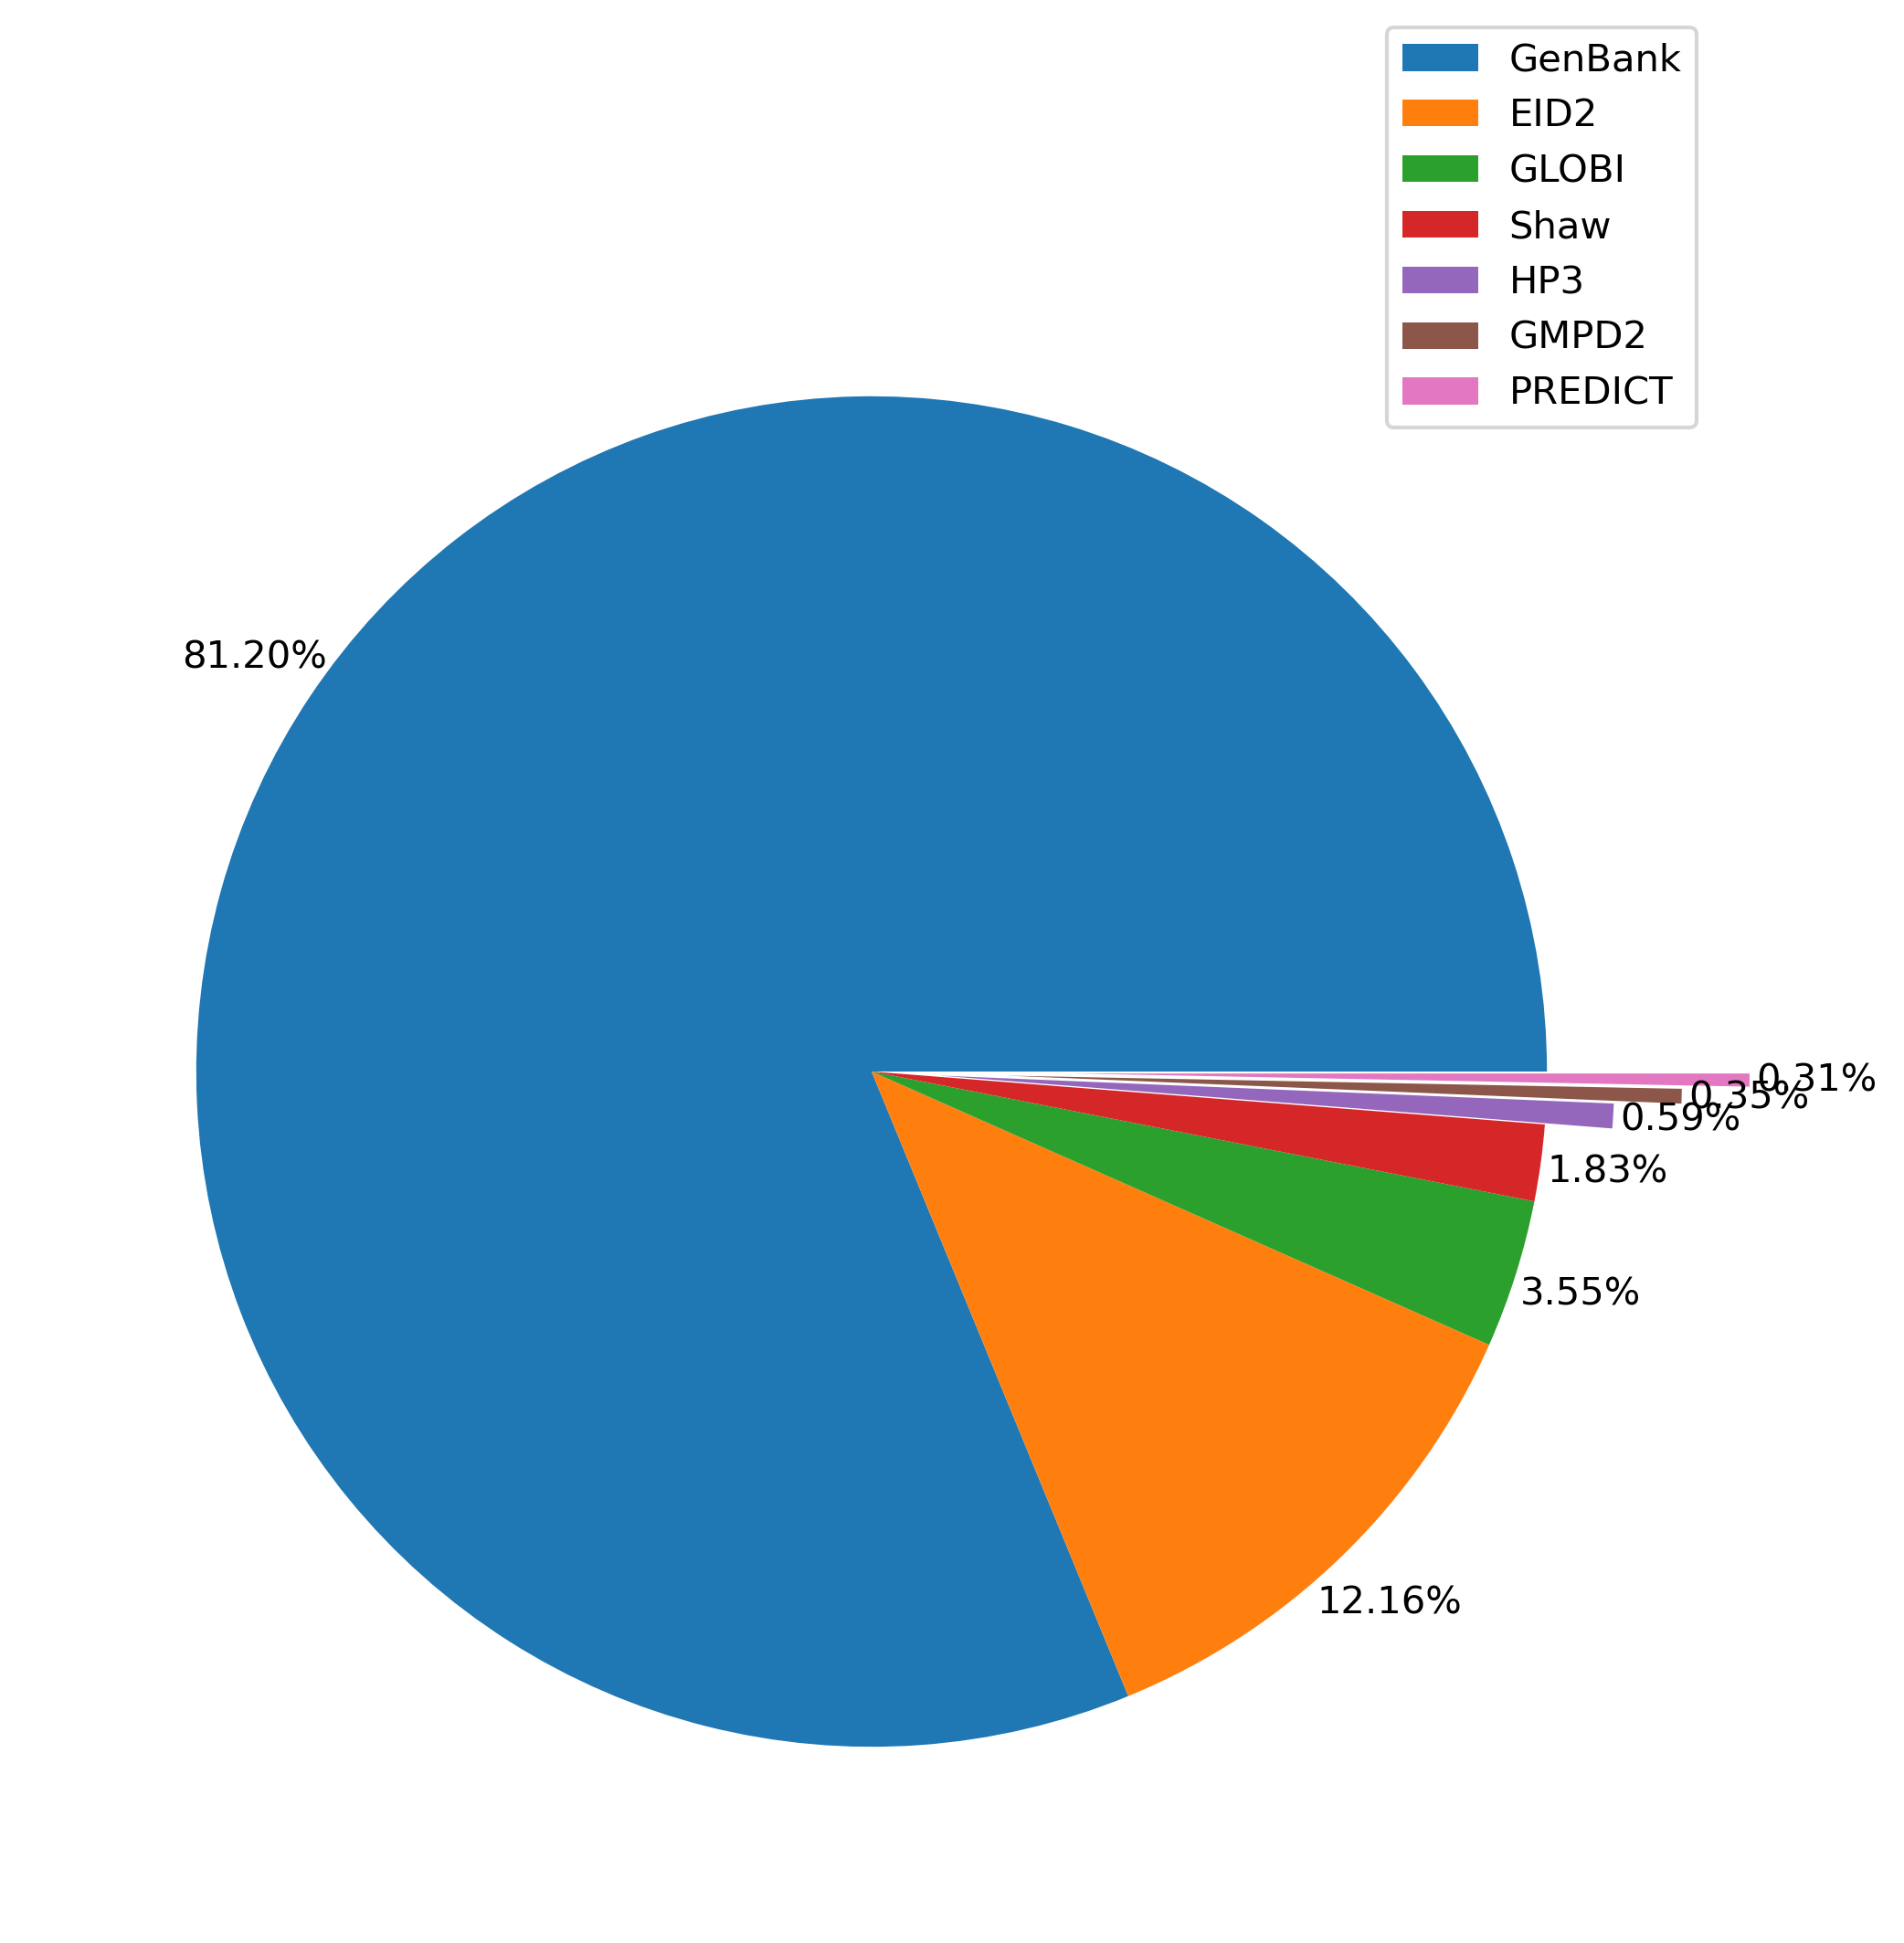

In [10]:
import matplotlib.pyplot as plt

plt.figure(dpi=300,figsize=(24,8))
plt.pie(data_from, explode=(0,0,0,0,0.1,0.2,0.3), autopct='%3.2f%%', pctdistance=1.1)
plt.legend(labels=data_from.index, loc="right", bbox_to_anchor=(1,1))
plt.savefig("database_statistic.png", format='png', bbox_inches='tight', dpi=300, transparent=True)

In [44]:
# sunburst

In [14]:
host_data = data['HostTaxID']

In [20]:
host_taxid = list(host_data)
with open('/home/bio_kang/Learning/graduation/virus_host/statistic_virion/host.txt','w') as f:
    f.writelines(list(map(lambda x:x+'\n', host_taxid)))

: 

In [16]:
host_data = host_data.drop_duplicates()

In [11]:
host_data

0          38527
13         29094
18         29098
21        682468
23         57777
           ...  
469840    135981
469845     36299
469855     43581
469860    157541
469941    218840
Name: HostTaxID, Length: 3627, dtype: object

In [2]:
import os

os.system(' cat host.txt | /home/bio_kang/software/anaconda3/envs/bio/bin/taxonkit reformat -I 1 -f "{p};{c};{o};{f};{g};{s}" > taxon_host.txt ')

09:22:52.243 [WARN] taxid 699554 was merged into 2848748
09:22:52.243 [WARN] taxid 9790 was merged into 89252
09:22:52.245 [WARN] taxid 218804 was merged into 2893490
09:22:52.246 [WARN] taxid 77235 was merged into 2853157
09:22:52.247 [WARN] taxid 132907 was merged into 2933645


0

In [6]:
with open("/home/bio_kang/Learning/graduation/virus_host/statistic_virion/taxon_host.txt", 'r') as f:
    taxon = f.readlines()

taxon_data = []
for line in taxon:
    line = line.strip('\n').split('\t')[1]
    taxon_data.append(line.split(';'))

In [8]:
import pandas as pd
write_data = pd.DataFrame(taxon_data,columns=["Phylum","Class","Order","Family","Genus","Species"])
write_data.to_csv('taxon_host.csv',index=None)

In [21]:
import plotly.express as px
import pandas as pd
import plotly

data = pd.read_csv('taxon_host.csv')
data = data.fillna(value='Unclassfied')
fig = px.sunburst(data,path=['Phylum','Class','Order','Family','Genus'])
fig.show()

plotly.offline.plot(fig,filename='Host_taxon.html')

'Host_taxon.html'

In [19]:
virus_data = data["VirusTaxID"]
virus_data = virus_data.drop_duplicates()
virus_data

0         1494919
1          696863
7         1437365
8          180230
9           11002
           ...   
469843    2814957
469856     986729
469863     169174
469920    2560613
469924    1980482
Name: VirusTaxID, Length: 9040, dtype: object

In [23]:
with open('/home/bio_kang/Learning/graduation/virus_host/statistic_virion/virus.txt','w') as f:
    f.writelines(list(map(lambda x:x+'\n', virus_data)))

In [28]:
import os

os.system(' cat virus.txt | /home/bio_kang/software/anaconda3/envs/bio/bin/taxonkit reformat -I 1 -f "{p};{c};{o};{f};{g};{s}" > taxon_virus.txt ')

0

In [30]:
with open("/home/bio_kang/Learning/graduation/virus_host/statistic_virion/taxon_virus.txt", 'r') as f:
    taxon = f.readlines()

taxon_data = []
for line in taxon:
    line = line.strip('\n').split('\t')[1]
    taxon_data.append(line.split(';'))

In [31]:
import pandas as pd
write_data = pd.DataFrame(taxon_data,columns=["Phylum","Class","Order","Family","Genus","Species"])
write_data.to_csv('taxon_virus.csv',index=None)

In [32]:
import plotly.express as px
import pandas as pd
import plotly

data = pd.read_csv('taxon_virus.csv')
data = data.fillna(value='Unclassfied')
fig = px.sunburst(data,path=['Phylum','Class','Order','Family','Genus'])
fig.show()

plotly.offline.plot(fig,filename='Virus_taxon.html')

'Virus_taxon.html'